# 勝敗の考案
20221128 なおき

In [60]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import array_to_latex

#　リバーシの結果の定義

<AxesSubplot: >

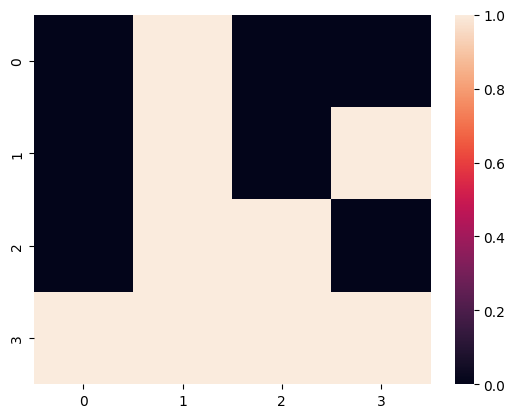

In [61]:
NUM_SQUARE=4
YOUR_COLOR="●"#1
COM_COLOR="◯"#0
board=np.random.randint(0,2,(NUM_SQUARE,NUM_SQUARE))
sns.heatmap(board)

##　angle:角度

<AxesSubplot: >

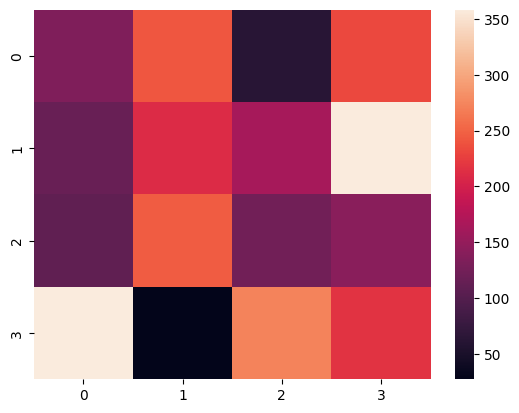

In [62]:
angle=np.random.random((NUM_SQUARE,NUM_SQUARE))*360
sns.heatmap(angle)

# シンプルリバーシ
boardを受け取って0/1の個数を数える


In [63]:
def normal_reversi(board):
    num_your=0
    num_com=0
    for y in range(NUM_SQUARE):
            for x in range(NUM_SQUARE):
                if board[y][x] == 1:
                    num_your += 1
                elif board[y][x] == 0:
                    num_com += 1
    simple_winner="Player2○"
    if num_your>num_com:
        simple_winner="Player1●"
    print(simple_winner,num_your,num_com)
normal_reversi(board)

Player1● 9 7


# Q-reversi(卒業式時点)
angleを受け取って各振幅計算し総和

In [64]:
def sum_sin_con(angle):
    # 確率振幅を合計する
    prop_your = 0
    prop_com = 0

    for y in range(NUM_SQUARE):
        for x in range(NUM_SQUARE):
            prop_your += (np.cos((angle[y][x])/2))**2
            prop_com += (np.sin((angle[y][x])/2))**2

    prop_your = round(prop_your, 2)
    prop_com = round(prop_com, 2)
    q_winner="Player2○"
    if prop_your>prop_com:
        q_winner="Player1●"
    print(q_winner,prop_your,prop_com)
sum_sin_con(angle)

Player2○ 7.19 8.81


# Q-reversi(なおき考案)
angleを受け取って各bitに対応させ1回測定

In [65]:
def each_qbit(angle):
    qc = QuantumCircuit(0)
    qr = QuantumRegister(NUM_SQUARE*NUM_SQUARE)
    qc.add_register(qr)
    qc.h(qr)
    for y in range(NUM_SQUARE):
        for x in range(NUM_SQUARE):
            qc.ry(angle[y][x], qr[y*NUM_SQUARE+x])
    cr = ClassicalRegister(NUM_SQUARE*NUM_SQUARE,'creg')
    qc.add_register(cr)                             #測定後の0or1を保存する従来のレジスタ   確率ではない
    qc.measure(qr,cr)                         #観測する
    sim = Aer.get_backend('qasm_simulator')        #実際に動かした時のシミュレータ
    res = sim.run(qc, shots = 1).result()    
    ans=list(res.get_counts().keys())[0]
    num_your=ans.count("1")
    num_com=ans.count("0")
    simple_winner="Player2○"
    if num_your>num_com:
        simple_winner="Player1●"
    print(simple_winner,num_your,num_com)
    return qc,ans
qc,ans=each_qbit(angle)

Player2○ 7 9


In [66]:
qc.draw()

┌───┐┌────────────┐┌─┐                                             
  q30_0: ┤ H ├┤ Ry(133.93) ├┤M├─────────────────────────────────────────────
         ├───┤├────────────┤└╥┘┌─┐                                          
  q30_1: ┤ H ├┤ Ry(241.58) ├─╫─┤M├──────────────────────────────────────────
         ├───┤├────────────┤ ║ └╥┘┌─┐                                       
  q30_2: ┤ H ├┤ Ry(63.371) ├─╫──╫─┤M├───────────────────────────────────────
         ├───┤├────────────┤ ║  ║ └╥┘┌─┐                                    
  q30_3: ┤ H ├┤ Ry(232.75) ├─╫──╫──╫─┤M├────────────────────────────────────
         ├───┤├────────────┤ ║  ║  ║ └╥┘┌─┐                                 
  q30_4: ┤ H ├┤ Ry(115.23) ├─╫──╫──╫──╫─┤M├─────────────────────────────────
         ├───┤├────────────┤ ║  ║  ║  ║ └╥┘┌─┐                              
  q30_5: ┤ H ├┤ Ry(209.96) ├─╫──╫──╫──╫──╫─┤M├──────────────────────────────
         ├───┤├───────────┬┘ ║  ║  ║  ║  ║ └╥┘┌─┐                           
  q30_6: ┤ H ├┤ Ry(163.2) ├──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
         ├───┤├───────────┴┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
  q30_7: ┤ H ├┤ Ry(358.21) ├─╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
  q30_8: ┤ H ├┤ Ry(109.35) ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
         ├───┤├───────────┬┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
  q30_9: ┤ H ├┤ Ry(245.5) ├──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
         ├───┤├───────────┴┐ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
 q30_10: ┤ H ├┤ Ry(123.23) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
 q30_11: ┤ H ├┤ Ry(141.09) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
 q30_12: ┤ H ├┤ Ry(358.16) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q30_13: ┤ H ├┤ Ry(27.236) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q30_14: ┤ H ├┤ Ry(272.45) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤├────────────┤ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q30_15: ┤ H ├┤ Ry(217.26) ├─╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘└────────────┘ ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
creg: 16/════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                             0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

<AxesSubplot: >

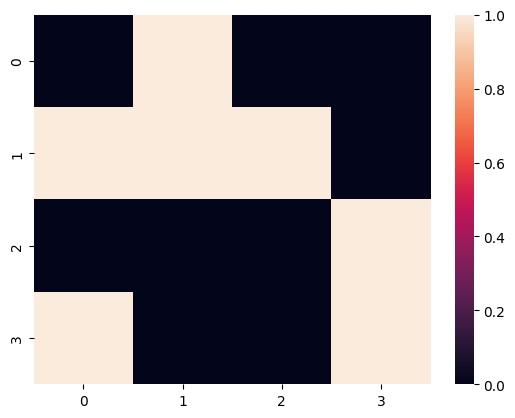

In [67]:
ans_np=np.zeros(((NUM_SQUARE,NUM_SQUARE)))
for n,a in enumerate(ans):
    i=n//NUM_SQUARE
    j=n%NUM_SQUARE
    ans_np[i][j]=a
sns.heatmap(ans_np)

# Q-reversi(Kさん考案)（たぶんこれ）
angleを受け取って1bitにいれ振幅計算

In [68]:
def one_qbit(angle):
    qc = QuantumCircuit(0)
    qr = QuantumRegister(1)
    qc.add_register(qr)
    qc.h(qr)
    for y in range(NUM_SQUARE):
        for x in range(NUM_SQUARE):
            qc.ry(angle[y][x], qr[0])
    sim = Aer.get_backend('statevector_simulator')
    res = sim.run(qc).result()
    state = res.data()["statevector"]
    prop_your = (state[1] * state[1].conjugate()).real
    prop_com = (state[0] * state[0].conjugate()).real
    prop_your = round(prop_your, 2)
    prop_com = round(prop_com, 2)
    q_winner="Player2○"
    if prop_your>prop_com:
        q_winner="Player1●"
    print(q_winner,prop_your,prop_com)

    return qc,ans
qc,ans=one_qbit(angle)

Player1● 0.63 0.37


In [69]:
qc.draw()

┌───┐┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q31: ┤ H ├┤ Ry(133.93) ├┤ Ry(241.58) ├┤ Ry(63.371) ├┤ Ry(232.75) ├»
     └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
«     ┌────────────┐┌────────────┐┌───────────┐┌────────────┐┌────────────┐»
«q31: ┤ Ry(115.23) ├┤ Ry(209.96) ├┤ Ry(163.2) ├┤ Ry(358.21) ├┤ Ry(109.35) ├»
«     └────────────┘└────────────┘└───────────┘└────────────┘└────────────┘»
«     ┌───────────┐┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
«q31: ┤ Ry(245.5) ├┤ Ry(123.23) ├┤ Ry(141.09) ├┤ Ry(358.16) ├┤ Ry(27.236) ├»
«     └───────────┘└────────────┘└────────────┘└────────────┘└────────────┘»
«     ┌────────────┐┌────────────┐
«q31: ┤ Ry(272.45) ├┤ Ry(217.26) ├
«     └────────────┘└────────────┘